Which Factors Influence the Price of Health Insurance?
Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
IS_Data=pd.read_csv("/content/insurance (2).csv")

In [3]:
IS_Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
IS_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


/tmp/ipython-input-1739962471.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(IS_Data["charges"],kde=True,color="c")


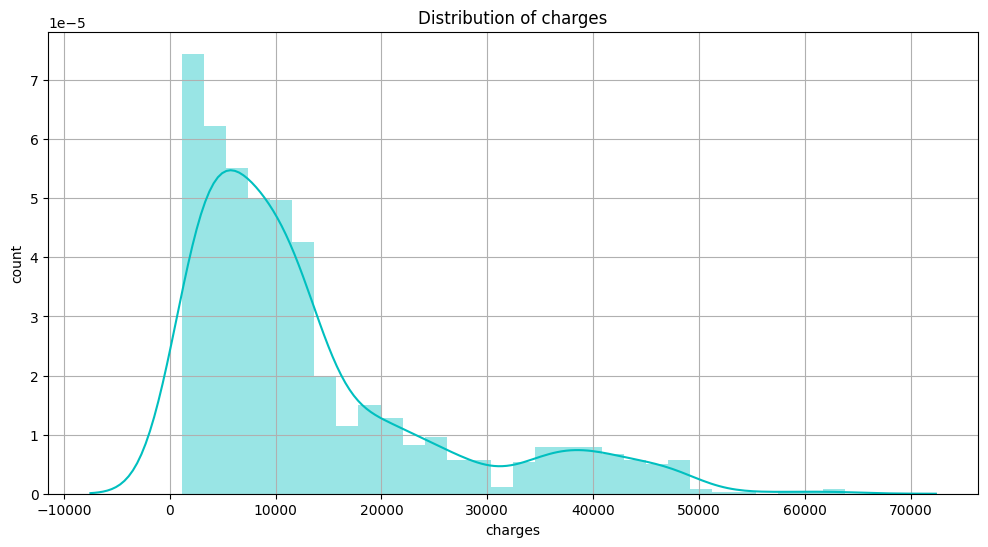

In [5]:
#EDA (exploratory data analysis) use for data visualization
plt.figure(figsize=(12,6))
sns.distplot(IS_Data["charges"],kde=True,color="c")
plt.title("Distribution of charges")
plt.xlabel("charges")
plt.ylabel("count")
plt.grid(True)
plt.show()

<Axes: xlabel='region', ylabel='charges'>

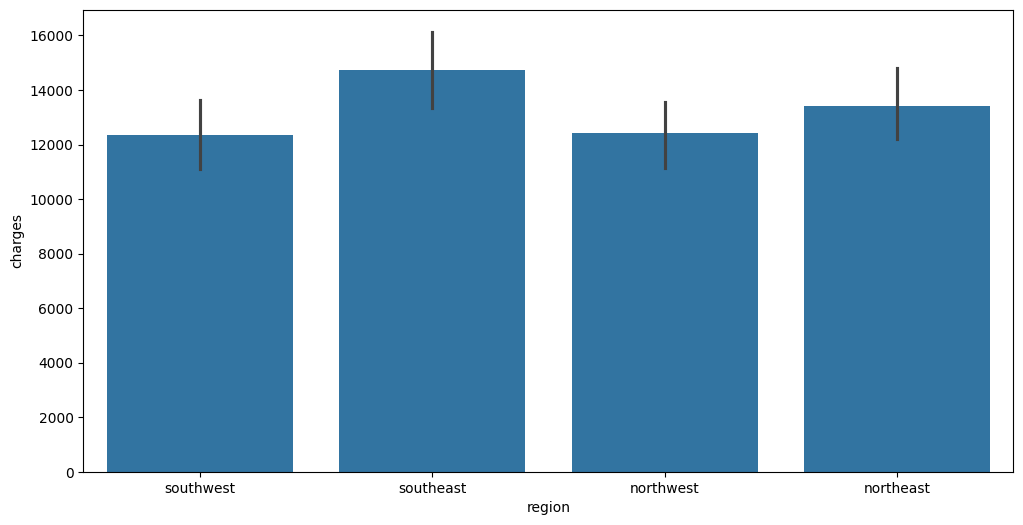

In [6]:
#barplot
plt.figure(figsize=(12,6))
sns.barplot(x="region",y="charges",data=IS_Data)

/tmp/ipython-input-1275656158.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charge.values,y=charge.index,palette="colorblind")


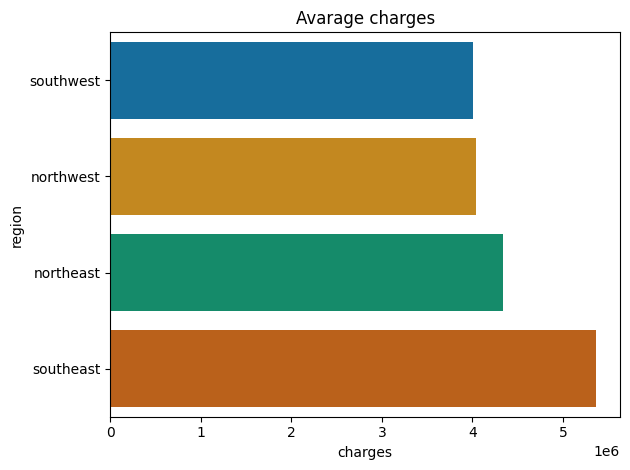

In [7]:
#barplot another method
charges=IS_Data["charges"].groupby(IS_Data.region).sum().sort_values(ascending=True)

charge=charges.head()

sns.barplot(x=charge.values,y=charge.index,palette="colorblind")
plt.title("Avarage charges")
plt.xlabel("charges")
plt.ylabel("region")
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='charges'>

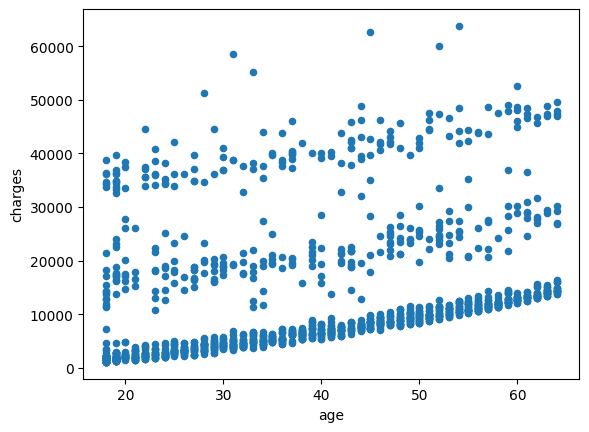

In [8]:
IS_Data.plot.scatter(x="age",y="charges")

In [9]:
#converting the data into numerical variable.
IS_Data["sex"]=IS_Data["sex"].apply({"male":0,"female":1}.get)

In [10]:
IS_Data["smoker"]=IS_Data["smoker"].apply({"yes":0,"no":1}.get)
IS_Data["region"]=IS_Data["region"].apply({"southwest":0,"southeast":1,"northwest":2,"northeast":3}.get)

In [11]:
#divide the data into dependent and independent variable
x=IS_Data.drop(["charges"],axis=1)
y=IS_Data["charges"]

In [12]:
#splittig the data train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
y_test.shape

(268,)

In [14]:
#using ML algoritham predicting the charges
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [15]:
regression.fit(x_train,y_train)

LinearRegression()

In [17]:
prediction=regression.predict(x_test)

In [18]:
prediction

array([13741.0420227 , 13131.74552787,  1540.43626249,   796.48100415,
        2465.20394762,  7730.19851201, 11289.27773594, 12954.24516312,
       14768.53079916, 12163.7790133 ,  8309.60023529, 10906.65524661,
       -1751.90903121, 18181.41979899, 10080.86809705, -1317.49496385,
        7619.06084512,  9299.07548693,  7733.75841115,  2052.11511409,
       11742.87493802, 12176.32659799, 12021.22355007,  2979.81594774,
        3012.79063225, 26906.11470279,  3963.1501164 ,  3301.60269147,
        8285.55279384, 11388.34034952, 26794.06958612,  7062.83879219,
       12801.06591042, 13943.01671843,  3073.42737533,  3895.69414455,
       17323.38537911, 35809.10091912, 38456.99649818,  3336.54433219,
       10282.70854078, 26989.08741568, 22725.18348438,  9183.67840802,
       34790.07310199, 10375.64881584, 37056.09241183, 29701.95391579,
        9575.538964  ,  9736.73083966,  5552.39923354, 17500.68674132,
        9138.00129857,  5634.48306407,  8632.52896199,  2248.66235884,
      

In [19]:
accuracy_score=regression.score(x_test,y_test)

In [20]:
accuracy_score

0.7698078025605102

In [21]:
#find mean squared error and r2 score
from sklearn.metrics import mean_squared_error,r2_score
MSE=mean_squared_error(y_test,prediction)
R2=r2_score(y_test,prediction)

In [22]:
print("MSE:",MSE)
print("R2:",R2)

MSE: 37562808.80394661
R2: 0.7698078025605102


In [23]:
#predicting charges for new coustomer
NC={"age":32,"sex":1,"bmi":28.280,"children":2,	"smoker":1,"region":2}

In [24]:
index_no=[1]

In [26]:
NC_charges=pd.DataFrame(NC,index=index_no)

In [27]:
NC_charges

,age,sex,bmi,children,smoker,region
1,32,1,28.28,2,1,2


In [29]:
prediction=regression.predict(NC_charges)

In [31]:
print("the charges for New costomer are",prediction)

the charges for New costomer are [6563.42406075]


In [33]:
NC2={"age":45,"sex":0,"bmi":31.280,"children":0,"smoker":0,"region":4}
index_no=[450]

In [34]:
NC2_charges=pd.DataFrame(NC2,index_no)

In [35]:
NC2_charges

,age,sex,bmi,children,smoker,region
450,45,0,31.28,0,0,4


In [36]:
prediction1=regression.predict(NC2_charges)
print("the new costomer chargs are = ",prediction1)

the new costomer chargs are =  [33742.56538794]
